In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from pylab import rcParams

In [2]:
dataset = pd.read_csv('Documents/new_processed_data_acc_ori_gyr_jayanth.csv')
df = dataset.dropna()

dataset2 = pd.read_csv('Documents/new_processed_data_acc_ori_gyr_our.csv')
df2 = dataset2.dropna()

dataset3 = pd.read_csv('Documents/new_processed_data_acc_ori_gyr_shweta.csv')
df3 = dataset3.dropna()

dataset4 = pd.read_csv('Documents/new_processed_data_acc_ori_gyr_jeet.csv')
df4 = dataset4.dropna()

dataset5 = pd.read_csv('Documents/new_processed_data_acc_ori_gyr_jeet2.csv')
df5 = dataset5.dropna()


In [3]:
df_all = pd.concat([df,df3,df4,df5])

In [4]:
print(df_all.columns)

Index(['Timestamp', ' acc_xmean', ' acc_ymean', ' acc_zmean', ' acc_xstd',
       ' acc_ystd', ' acc_zstd', ' acc_xmax', ' acc_ymax', ' acc_zmax',
       ' acc_xmin', ' acc_ymin', ' acc_zmin', ' acc_class', ' gyr_xmean',
       ' gyr_ymean', ' gyr_zmean', ' gyr_xstd', ' gyr_ystd', ' gyr_zstd',
       ' gyr_xmax', ' gyr_ymax', ' gyr_zmax', ' gyr_xmin', ' gyr_ymin',
       ' gyr_zmin', ' gyr_class', ' ori_xmean', ' ori_ymean', ' ori_zmean',
       ' ori_xstd', ' ori_ystd', ' ori_zstd', ' ori_xmax', ' ori_ymax',
       ' ori_zmax', ' ori_xmin', ' ori_ymin', ' ori_zmin', ' ori_class '],
      dtype='object')


In [5]:
df_all.head()
df_all.columns
df_all2 = df_all[df_all[' ori_class '] != 'null']


In [6]:
df_test = df2[df2[' ori_class '] != 'null']

In [7]:
df_all2.head()

,Timestamp,acc_xmean,acc_ymean,acc_zmean,acc_xstd,acc_ystd,acc_zstd,acc_xmax,acc_ymax,acc_zmax,...,ori_xstd,ori_ystd,ori_zstd,ori_xmax,ori_ymax,ori_zmax,ori_xmin,ori_ymin,ori_zmin,ori_class
0,1520315642223_1520315646223,0.315889,-1.645279,7.579263,3.214543,4.971555,2.669365,11.312344,3.049498,18.359220,...,107.745013,42.379563,30.144744,359.999700,31.268667,81.459230,-0.000000,-128.087110,-13.776710,sitting
1,1520315646223_1520315650223,-2.481922,-8.678849,4.014229,0.259851,0.248557,0.435259,1.019691,-6.458041,9.742115,...,25.282045,13.957877,19.516883,348.611020,66.533320,83.089540,4.995914,-33.325333,15.406474,sitting
2,1520315650223_1520315654223,2.320864,-6.358494,3.739560,4.694261,3.292626,2.955463,10.354887,2.704813,8.401677,...,6.349352,22.021231,32.094950,88.021270,127.641040,15.536949,57.741127,2.026753,-62.501076,sitting
3,1520315654223_1520315658223,6.527179,-4.062275,4.178595,1.594441,3.545704,3.794829,11.187874,7.568690,10.421909,...,6.743819,26.489241,9.034738,102.257100,109.734450,-19.463050,77.679790,10.640762,-58.251316,sitting
4,1520315658223_1520315662223,3.781867,-7.256935,3.771565,1.542096,2.999233,3.374467,9.397431,12.317672,16.999632,...,6.442724,20.910975,12.131508,107.747665,95.800575,-14.423980,79.994090,12.158220,-61.458770,sitting


In [8]:
df_all3 = df_all2.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,27,28,29,30,31,32,33,34,35,36,37,38,39]]
df_all3.head()

,acc_xmean,acc_ymean,acc_zmean,acc_xstd,acc_ystd,acc_zstd,acc_xmax,acc_ymax,acc_zmax,acc_xmin,...,ori_xstd,ori_ystd,ori_zstd,ori_xmax,ori_ymax,ori_zmax,ori_xmin,ori_ymin,ori_zmin,ori_class
0,0.315889,-1.645279,7.579263,3.214543,4.971555,2.669365,11.312344,3.049498,18.359220,-19.603912,...,107.745013,42.379563,30.144744,359.999700,31.268667,81.459230,-0.000000,-128.087110,-13.776710,sitting
1,-2.481922,-8.678849,4.014229,0.259851,0.248557,0.435259,1.019691,-6.458041,9.742115,-4.772918,...,25.282045,13.957877,19.516883,348.611020,66.533320,83.089540,4.995914,-33.325333,15.406474,sitting
2,2.320864,-6.358494,3.739560,4.694261,3.292626,2.955463,10.354887,2.704813,8.401677,-3.930357,...,6.349352,22.021231,32.094950,88.021270,127.641040,15.536949,57.741127,2.026753,-62.501076,sitting
3,6.527179,-4.062275,4.178595,1.594441,3.545704,3.794829,11.187874,7.568690,10.421909,-4.351638,...,6.743819,26.489241,9.034738,102.257100,109.734450,-19.463050,77.679790,10.640762,-58.251316,sitting
4,3.781867,-7.256935,3.771565,1.542096,2.999233,3.374467,9.397431,12.317672,16.999632,-0.665432,...,6.442724,20.910975,12.131508,107.747665,95.800575,-14.423980,79.994090,12.158220,-61.458770,sitting


In [9]:
df_test2 = df_test.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,27,28,29,30,31,32,33,34,35,36,37,38,39]]
df_test2.head()
len(df_test2)

1948

In [10]:
N_TIME_STEPS = 10
N_FEATURES = 36
step = 1
segments = []
labels = []
for i in range(0, len(df_all3) - N_TIME_STEPS, step):
    axmean = df_all3[' acc_xmean'].values[i: i + N_TIME_STEPS]
    aymean = df_all3[' acc_ymean'].values[i: i + N_TIME_STEPS]
    azmean = df_all3[' acc_zmean'].values[i: i + N_TIME_STEPS]
    axstd = df_all3[' acc_xstd'].values[i: i + N_TIME_STEPS]
    aystd = df_all3[' acc_ystd'].values[i: i + N_TIME_STEPS]
    azstd = df_all3[' acc_zstd'].values[i: i + N_TIME_STEPS]
    axmax = df_all3[' acc_xmax'].values[i: i + N_TIME_STEPS]
    aymax = df_all3[' acc_ymax'].values[i: i + N_TIME_STEPS]
    azmax = df_all3[' acc_zmax'].values[i: i + N_TIME_STEPS]
    axmin = df_all3[' acc_xmin'].values[i: i + N_TIME_STEPS]
    aymin = df_all3[' acc_ymin'].values[i: i + N_TIME_STEPS]
    azmin = df_all3[' acc_zmin'].values[i: i + N_TIME_STEPS]
    
    gxmean = df_all3[' gyr_xmean'].values[i: i + N_TIME_STEPS]
    gymean = df_all3[' gyr_ymean'].values[i: i + N_TIME_STEPS]
    gzmean = df_all3[' gyr_zmean'].values[i: i + N_TIME_STEPS]
    gxstd = df_all3[' gyr_xstd'].values[i: i + N_TIME_STEPS]
    gystd = df_all3[' gyr_ystd'].values[i: i + N_TIME_STEPS]
    gzstd = df_all3[' gyr_zstd'].values[i: i + N_TIME_STEPS]
    gxmax = df_all3[' gyr_xmax'].values[i: i + N_TIME_STEPS]
    gymax = df_all3[' gyr_ymax'].values[i: i + N_TIME_STEPS]
    gzmax = df_all3[' gyr_zmax'].values[i: i + N_TIME_STEPS]
    gxmin = df_all3[' gyr_xmin'].values[i: i + N_TIME_STEPS]
    gymin = df_all3[' gyr_ymin'].values[i: i + N_TIME_STEPS]
    gzmin = df_all3[' gyr_zmin'].values[i: i + N_TIME_STEPS]
    
    oxmean = df_all3[' ori_xmean'].values[i: i + N_TIME_STEPS]
    oymean = df_all3[' ori_ymean'].values[i: i + N_TIME_STEPS]
    ozmean = df_all3[' ori_zmean'].values[i: i + N_TIME_STEPS]
    oxstd = df_all3[' ori_xstd'].values[i: i + N_TIME_STEPS]
    oystd = df_all3[' ori_ystd'].values[i: i + N_TIME_STEPS]
    ozstd = df_all3[' ori_zstd'].values[i: i + N_TIME_STEPS]
    oxmax = df_all3[' ori_xmax'].values[i: i + N_TIME_STEPS]
    oymax = df_all3[' ori_ymax'].values[i: i + N_TIME_STEPS]
    ozmax = df_all3[' ori_zmax'].values[i: i + N_TIME_STEPS]
    oxmin = df_all3[' ori_xmin'].values[i: i + N_TIME_STEPS]
    oymin = df_all3[' ori_ymin'].values[i: i + N_TIME_STEPS]
    ozmin = df_all3[' ori_zmin'].values[i: i + N_TIME_STEPS]
    label = stats.mode(df_all3[' ori_class '][i: i + N_TIME_STEPS])[0][0]
    segments.append([axmean,aymean,azmean,axstd,aystd,azstd,axmax,aymax,azmax,axmin,aymin,azmin,gxmean,gymean,gzmean,gxstd,gystd,gzstd,gxmax,gymax,gzmax,gxmin,gymin,gzmin,oxmean,oymean,ozmean,oxstd,oystd,ozstd,oxmax,oymax,ozmax,oxmin,oymin,ozmin])
    labels.append(label)

c:\users\shivu.soman\anaconda3\envs\tensorflow\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [11]:
N_TIME_STEPS = 10
N_FEATURES = 36
step = 1
segments2 = []
labels2 = []
for i in range(0, len(df_test2) - N_TIME_STEPS, step):
    axmean = df_test2[' acc_xmean'].values[i: i + N_TIME_STEPS]
    aymean = df_test2[' acc_ymean'].values[i: i + N_TIME_STEPS]
    azmean = df_test2[' acc_zmean'].values[i: i + N_TIME_STEPS]
    axstd = df_test2[' acc_xstd'].values[i: i + N_TIME_STEPS]
    aystd = df_test2[' acc_ystd'].values[i: i + N_TIME_STEPS]
    azstd = df_test2[' acc_zstd'].values[i: i + N_TIME_STEPS]
    axmax = df_test2[' acc_xmax'].values[i: i + N_TIME_STEPS]
    aymax = df_test2[' acc_ymax'].values[i: i + N_TIME_STEPS]
    azmax = df_test2[' acc_zmax'].values[i: i + N_TIME_STEPS]
    axmin = df_test2[' acc_xmin'].values[i: i + N_TIME_STEPS]
    aymin = df_test2[' acc_ymin'].values[i: i + N_TIME_STEPS]
    azmin = df_test2[' acc_zmin'].values[i: i + N_TIME_STEPS]
    
    gxmean = df_test2[' gyr_xmean'].values[i: i + N_TIME_STEPS]
    gymean = df_test2[' gyr_ymean'].values[i: i + N_TIME_STEPS]
    gzmean = df_test2[' gyr_zmean'].values[i: i + N_TIME_STEPS]
    gxstd = df_test2[' gyr_xstd'].values[i: i + N_TIME_STEPS]
    gystd = df_test2[' gyr_ystd'].values[i: i + N_TIME_STEPS]
    gzstd = df_test2[' gyr_zstd'].values[i: i + N_TIME_STEPS]
    gxmax = df_test2[' gyr_xmax'].values[i: i + N_TIME_STEPS]
    gymax = df_test2[' gyr_ymax'].values[i: i + N_TIME_STEPS]
    gzmax = df_test2[' gyr_zmax'].values[i: i + N_TIME_STEPS]
    gxmin = df_test2[' gyr_xmin'].values[i: i + N_TIME_STEPS]
    gymin = df_test2[' gyr_ymin'].values[i: i + N_TIME_STEPS]
    gzmin = df_test2[' gyr_zmin'].values[i: i + N_TIME_STEPS]
    
    oxmean = df_test2[' ori_xmean'].values[i: i + N_TIME_STEPS]
    oymean = df_test2[' ori_ymean'].values[i: i + N_TIME_STEPS]
    ozmean = df_test2[' ori_zmean'].values[i: i + N_TIME_STEPS]
    oxstd = df_test2[' ori_xstd'].values[i: i + N_TIME_STEPS]
    oystd = df_test2[' ori_ystd'].values[i: i + N_TIME_STEPS]
    ozstd = df_test2[' ori_zstd'].values[i: i + N_TIME_STEPS]
    oxmax = df_test2[' ori_xmax'].values[i: i + N_TIME_STEPS]
    oymax = df_test2[' ori_ymax'].values[i: i + N_TIME_STEPS]
    ozmax = df_test2[' ori_zmax'].values[i: i + N_TIME_STEPS]
    oxmin = df_test2[' ori_xmin'].values[i: i + N_TIME_STEPS]
    oymin = df_test2[' ori_ymin'].values[i: i + N_TIME_STEPS]
    ozmin = df_test2[' ori_zmin'].values[i: i + N_TIME_STEPS]
    label = stats.mode(df_test2[' ori_class '][i: i + N_TIME_STEPS])[0][0]
    segments2.append([axmean,aymean,azmean,axstd,aystd,azstd,axmax,aymax,azmax,axmin,aymin,azmin,gxmean,gymean,gzmean,gxstd,gystd,gzstd,gxmax,gymax,gzmax,gxmin,gymin,gzmin,oxmean,oymean,ozmean,oxstd,oystd,ozstd,oxmax,oymax,ozmax,oxmin,oymin,ozmin])
    labels2.append(label)

c:\users\shivu.soman\anaconda3\envs\tensorflow\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [12]:
np.array(segments).shape

(16280, 36, 10)

In [13]:
np.array(segments2).shape

(1938, 36, 10)

In [14]:
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, N_TIME_STEPS, N_FEATURES)
labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)

In [15]:
reshaped_segments2 = np.asarray(segments2, dtype= np.float32).reshape(-1, N_TIME_STEPS, N_FEATURES)
labels2 = np.asarray(pd.get_dummies(labels2), dtype = np.float32)

In [16]:
reshaped_segments.shape

(16280, 10, 36)

In [17]:
reshaped_segments2.shape

(1938, 10, 36)

In [18]:
X_test2 = reshaped_segments2
y_test2 = labels2

In [19]:
X_train = reshaped_segments
y_train = labels

In [20]:
N_CLASSES = 4
N_HIDDEN_UNITS = 64
def create_LSTM_model(inputs):
    W = {
        'hidden': tf.Variable(tf.random_normal([N_FEATURES, N_HIDDEN_UNITS])),
        'output': tf.Variable(tf.random_normal([N_HIDDEN_UNITS, N_CLASSES]))
    }
    biases = {
        'hidden': tf.Variable(tf.random_normal([N_HIDDEN_UNITS], mean=1.0)),
        'output': tf.Variable(tf.random_normal([N_CLASSES]))
    }
    
    X = tf.transpose(inputs, [1, 0, 2])
    X = tf.reshape(X, [-1, N_FEATURES])
    hidden = tf.nn.relu(tf.matmul(X, W['hidden']) + biases['hidden'])
    hidden = tf.split(hidden, N_TIME_STEPS, 0)

    # Stack 2 LSTM layers
    lstm_layers = [tf.contrib.rnn.BasicLSTMCell(N_HIDDEN_UNITS, forget_bias=1.0) for _ in range(2)]
    lstm_layers = tf.contrib.rnn.MultiRNNCell(lstm_layers)

    outputs, _ = tf.contrib.rnn.static_rnn(lstm_layers, hidden, dtype=tf.float32)

    # Get output for the last time step
    lstm_last_output = outputs[-1]

    return tf.matmul(lstm_last_output, W['output']) + biases['output']

In [21]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, N_TIME_STEPS, N_FEATURES], name="input")
Y = tf.placeholder(tf.float32, [None, N_CLASSES])

In [22]:
pred_Y = create_LSTM_model(X)
pred_softmax = tf.nn.softmax(pred_Y, name="y_")

In [23]:
L2_LOSS = 0.0015

l2 = L2_LOSS * \
    sum(tf.nn.l2_loss(tf_var) for tf_var in tf.trainable_variables())

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred_Y, labels = Y)) + l2

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [24]:
LEARNING_RATE = 0.0025

optimizer = tf.train.AdamOptimizer(learning_rate=LEARNING_RATE).minimize(loss)

correct_pred = tf.equal(tf.argmax(pred_softmax, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, dtype=tf.float32))

In [25]:
N_EPOCHS = 10
BATCH_SIZE = 1024
saver = tf.train.Saver()

history = dict(train_loss=[], 
                     train_acc=[], 
                     test_loss=[], 
                     test_acc=[])

sess=tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

train_count = len(X_train)

for i in range(1, N_EPOCHS + 1):
    for start, end in zip(range(0, train_count, BATCH_SIZE),
                          range(BATCH_SIZE, train_count + 1,BATCH_SIZE)):
        sess.run(optimizer, feed_dict={X: X_train[start:end],
                                       Y: y_train[start:end]})

    _, acc_train, loss_train = sess.run([pred_softmax, accuracy, loss], feed_dict={
                                            X: X_train, Y: y_train})

    _, acc_test, loss_test = sess.run([pred_softmax, accuracy, loss], feed_dict={
                                            X: X_test2, Y: y_test2})

    history['train_loss'].append(loss_train)
    history['train_acc'].append(acc_train)
    history['test_loss'].append(loss_test)
    history['test_acc'].append(acc_test)

    #if i != 1 and i % 10 != 0:
    #   continue

    print('epoch: ',i ,'test accuracy: ',acc_test ,'loss: ',loss_test)
    
predictions, acc_final, loss_final = sess.run([pred_softmax, accuracy, loss], feed_dict={X: X_test2, Y: y_test2})

print()
print('final results: accuracy: ',acc_final, 'loss: ',loss_final)

epoch:  1 test accuracy:  0.5773994 loss:  3.1458807
epoch:  2 test accuracy:  0.51547986 loss:  3.2457888
epoch:  3 test accuracy:  0.6382869 loss:  2.9492755
epoch:  4 test accuracy:  0.68266255 loss:  2.8746572
epoch:  5 test accuracy:  0.6713106 loss:  2.8167768
epoch:  6 test accuracy:  0.6759546 loss:  2.7869163
epoch:  7 test accuracy:  0.7022704 loss:  2.7177944
epoch:  8 test accuracy:  0.71775025 loss:  2.6488264
epoch:  9 test accuracy:  0.7017544 loss:  2.6129858
epoch:  10 test accuracy:  0.70846236 loss:  2.5801883

final results: accuracy:  0.70846236 loss:  2.5801883


In [26]:
predictions, acc_final, loss_final = sess.run([pred_softmax, accuracy, loss], feed_dict={X: X_test2, Y: y_test2})

In [27]:
print('final results: accuracy: ',acc_final, 'loss: ',loss_final)

final results: accuracy:  0.70846236 loss:  2.5801883


In [28]:
max_test = np.argmax(y_test2, axis=1)
max_predictions = np.argmax(predictions, axis=1)
print(classification_report(max_test,max_predictions))
print(f1_score(max_test,max_predictions,average="macro"))

             precision    recall  f1-score   support

          0       0.69      0.49      0.58       533
          1       0.52      0.77      0.62       515
          2       0.95      0.69      0.80       506
          3       0.84      0.96      0.90       384

avg / total       0.74      0.71      0.71      1938

0.7227073632589758


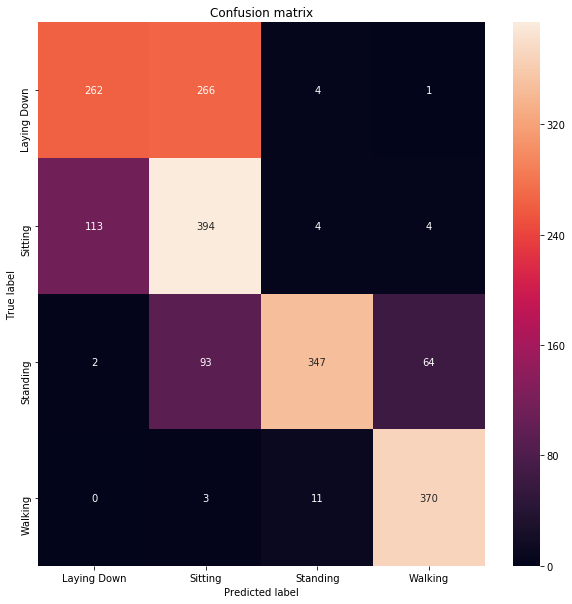

In [29]:
LABELS = ['Laying Down', 'Sitting', 'Standing', 'Walking']
confusion_matrix = confusion_matrix(max_test, max_predictions)
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show();